In [55]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [56]:
k = 0.23e3
cp = 897 
ro = 2.7e3
alfa = k/(ro*cp)
deltat = 1e-3 # s
deltax = 0.04 # m
deltay = 0.04 # m
Lx = 0.4 # m
Ly = 0.4 # m
tmax = 10 # s
erro = 1e-8
f0 = alfa*deltat/(deltax**2)

In [57]:
x = np.linspace(0, Lx, int(Lx/deltax)+1)
y = np.linspace(0, Ly, int(Ly/deltay)+1)
t = np.linspace(0, tmax, int(tmax/deltat)+1)
print(t)

[0.000e+00 1.000e-03 2.000e-03 ... 9.998e+00 9.999e+00 1.000e+01]


In [58]:
listatempo = []
for _ in range(len(t)):
    matrix = np.zeros((len(y),len(x)))
    listatempo.append(matrix)

In [59]:
for m,matrix in enumerate(listatempo):
    for i,linha in enumerate(matrix):
        for j,elem in enumerate(linha):
            if(i == 0):
                listatempo[m][i][j] = 150
            elif(j==len(x)-1):
                listatempo[m][i][j] = 50


In [60]:
vx = int(Lx/deltax)
vy = int(Ly/deltay)

over = False
copia = listatempo.copy()
for m,matrix in enumerate(copia):
    
    for i,linha in enumerate(matrix):
        for j,elem in enumerate(linha):
            if(i != 0 and i != vx and j != vy and m != len(t)-1):
                if(j != 0) :
                    Tx = copia[m][i+1][j] - 2*copia[m][i][j] + copia[m][i-1][j]
                    Ty = copia[m][i][j+1] - 2*copia[m][i][j] + copia[m][i][j-1]
                    copia[m+1][i][j] = alfa*deltat*((Tx/(deltax**2))+(Ty/(deltay**2))) + copia[m][i][j]
                elif(j==0):
                    copia[m+1][i][j]=f0*(2*copia[m][i][j+1]+copia[m][i+1][j]+copia[m][i-1][j])+(1-4*f0)*copia[m][i][j]
        
    if (m>0):
        ant=copia[m-1]
        list_errors=abs((matrix-ant)/(matrix+1e-10))
        
        if np.max(list_errors)<erro:
            break

max_erro = np.max(abs((copia[-1]-copia[-2])/(copia[-1]+1e-11 )))

print("acabou")

print(max_erro)
# for matrix in copia:
#     print(matrix)


acabou
0.0008011325875671475


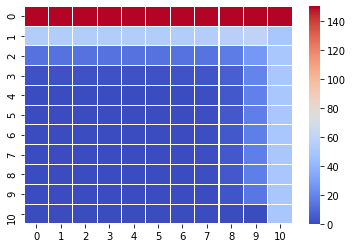

In [64]:
heatmap = sns.heatmap(copia[-1], annot = False, linewidths=.05,cmap='coolwarm')